<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/ML_Stats/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Data

In [ ]:
from google.colab import drive

import time
import math
import pandas as pd
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import statsmodels.api as sm
# reference: https://www.statology.org/aic-in-python/

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

path='/content/drive/MyDrive/CheCheConjecture/ML_Stats/DataSet/IRIS.csv'
'''
Source of the data set: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
'''
df = pd.read_csv(path)
df.head()
#df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
for i in df['species'].value_counts().index.tolist():
  df[i]=np.zeros(df.shape[0])
  # reference: https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
  # reference: https://www.statology.org/add-numpy-array-to-pandas-dataframe/

In [ ]:
for i in range(df.shape[0]):
  for j in range(3):
    if df.iloc[i,4]==df['species'].value_counts().index.tolist()[j]:
      df.iloc[i,j-3]=1

In [ ]:
df[df['species']==df['species'].value_counts().index.tolist()[2]].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,0.0,0.0,1.0
101,5.8,2.7,5.1,1.9,Iris-virginica,0.0,0.0,1.0
102,7.1,3.0,5.9,2.1,Iris-virginica,0.0,0.0,1.0
103,6.3,2.9,5.6,1.8,Iris-virginica,0.0,0.0,1.0
104,6.5,3.0,5.8,2.2,Iris-virginica,0.0,0.0,1.0


In [ ]:
df=df.drop('species', axis=1)

In [ ]:
df.iloc[:,[-3,-2,-1]]
# reference: https://sparkbyexamples.com/pandas/pandas-select-multiple-columns-in-dataframe/

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


**Why we separate training and testing data**
* training data is used for improve weight and bias ($\vec{w}$ and $\vec{b}$) of the machine learning model.
* testing data is used for evaluate the machine learning model. In addition it check if the model is not over fitting.

In [ ]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)

  TrainX=Data.iloc[:DataRatio,[0,1,2,3]]
  TrainY=Data.iloc[:DataRatio,[-3,-2,-1]]
  TesttX=Data.iloc[DataRatio:,[0,1,2,3]]
  TesttY=Data.iloc[DataRatio:,[-3,-2,-1]]

  return [TrainX,TrainY,TesttX,TesttY]

# Data A
Data=SeparateData(df,0.75,df.columns[-1])
TrX=Data[0]
TrY=Data[1]
TeX=Data[2]
TeY=Data[3]

#Introduction of Logistic Regression

##Introduction

**What is Logistic Regression?**

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help. (https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/)

**Type of Logistic Regression**
1. Binary logistic regression
* This algorithm compute the input $X$ into output $y$, where $y$ only means true or false.
* $y\in \{0,1\}$
* e.g. Is this picture has a dog? etc.
2. Multinomial logistic regression
* This algorithm categorize things into 3 or more types. It works by compute Binary logistic regression on each type in order to find out if something is likely to be categorized in one type than other.
* e.g.
* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?
* etc.
3. Ordinal logistic regression
* Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary.
* e.g. Movies Rate etc.

reference: https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/

**Why we do not use linear regression in this case?**

Linear Regression can only be used for predicting the relationship between continuous variable.

This algorithm is not good for classification task because
* In this case, output data can be classify into 2 values $\{0,1\}$, the linear regression algorithmn do not predict output data accuratly at all.
* In theory, $h(x)$ should be $0\leq h(x)\leq 1$ for boolean classification problem.

**What I will do in this tutorial?**
* I will demonstrate how to use Logistic Regression to predict the relationship between continue $x$ variable and discrete $y$ variable.

1. Implementing Logistic Regression
 1. Creating Hypothesis Function
 2. Creating Evaluating Function (Loss Function)
 3. Creating Optimization Function (Gradient Descent)
 5. implementing Logistic regression using SK learn library
4. Evaluate the accuracy of both models.
 1. Maximum Likelihood Estimation
 1. AIC (Akaike Information Criteria)
 2. Confusion matrix
 3. ROC curve
 4. Null deviance and residual deviance
4. Plotting Graph of both models.
 1. Ploting the accual and predicted value
 2. Ploting bias (x), weight (y) and the Loss function (z)
 3. Ploting the epochs and Loss function (y)

##Creating Hypothesis Function and define variables

**Hypothesis Function**

Hypothesis function is the function that estimated the pattern of the dataset.

* $\vec{y}'=h(X)=\frac{1}{1 + \exp({-(X\cdot \vec{w}+\vec{b})})}=$ Probability $\in[0,1]$
 * $m=$ number of all rows
 * $n=$ number of all features
 * $X\in\mathbb{R^{m\times n}}=$ input matrix
 * $\vec{y}'\in\mathbb{R^{n}}=$ output
 * $\vec{w}\in\mathbb{R^{n}}=$ weight
 * $\vec{b}\in\mathbb{R^{m}}=$ bias

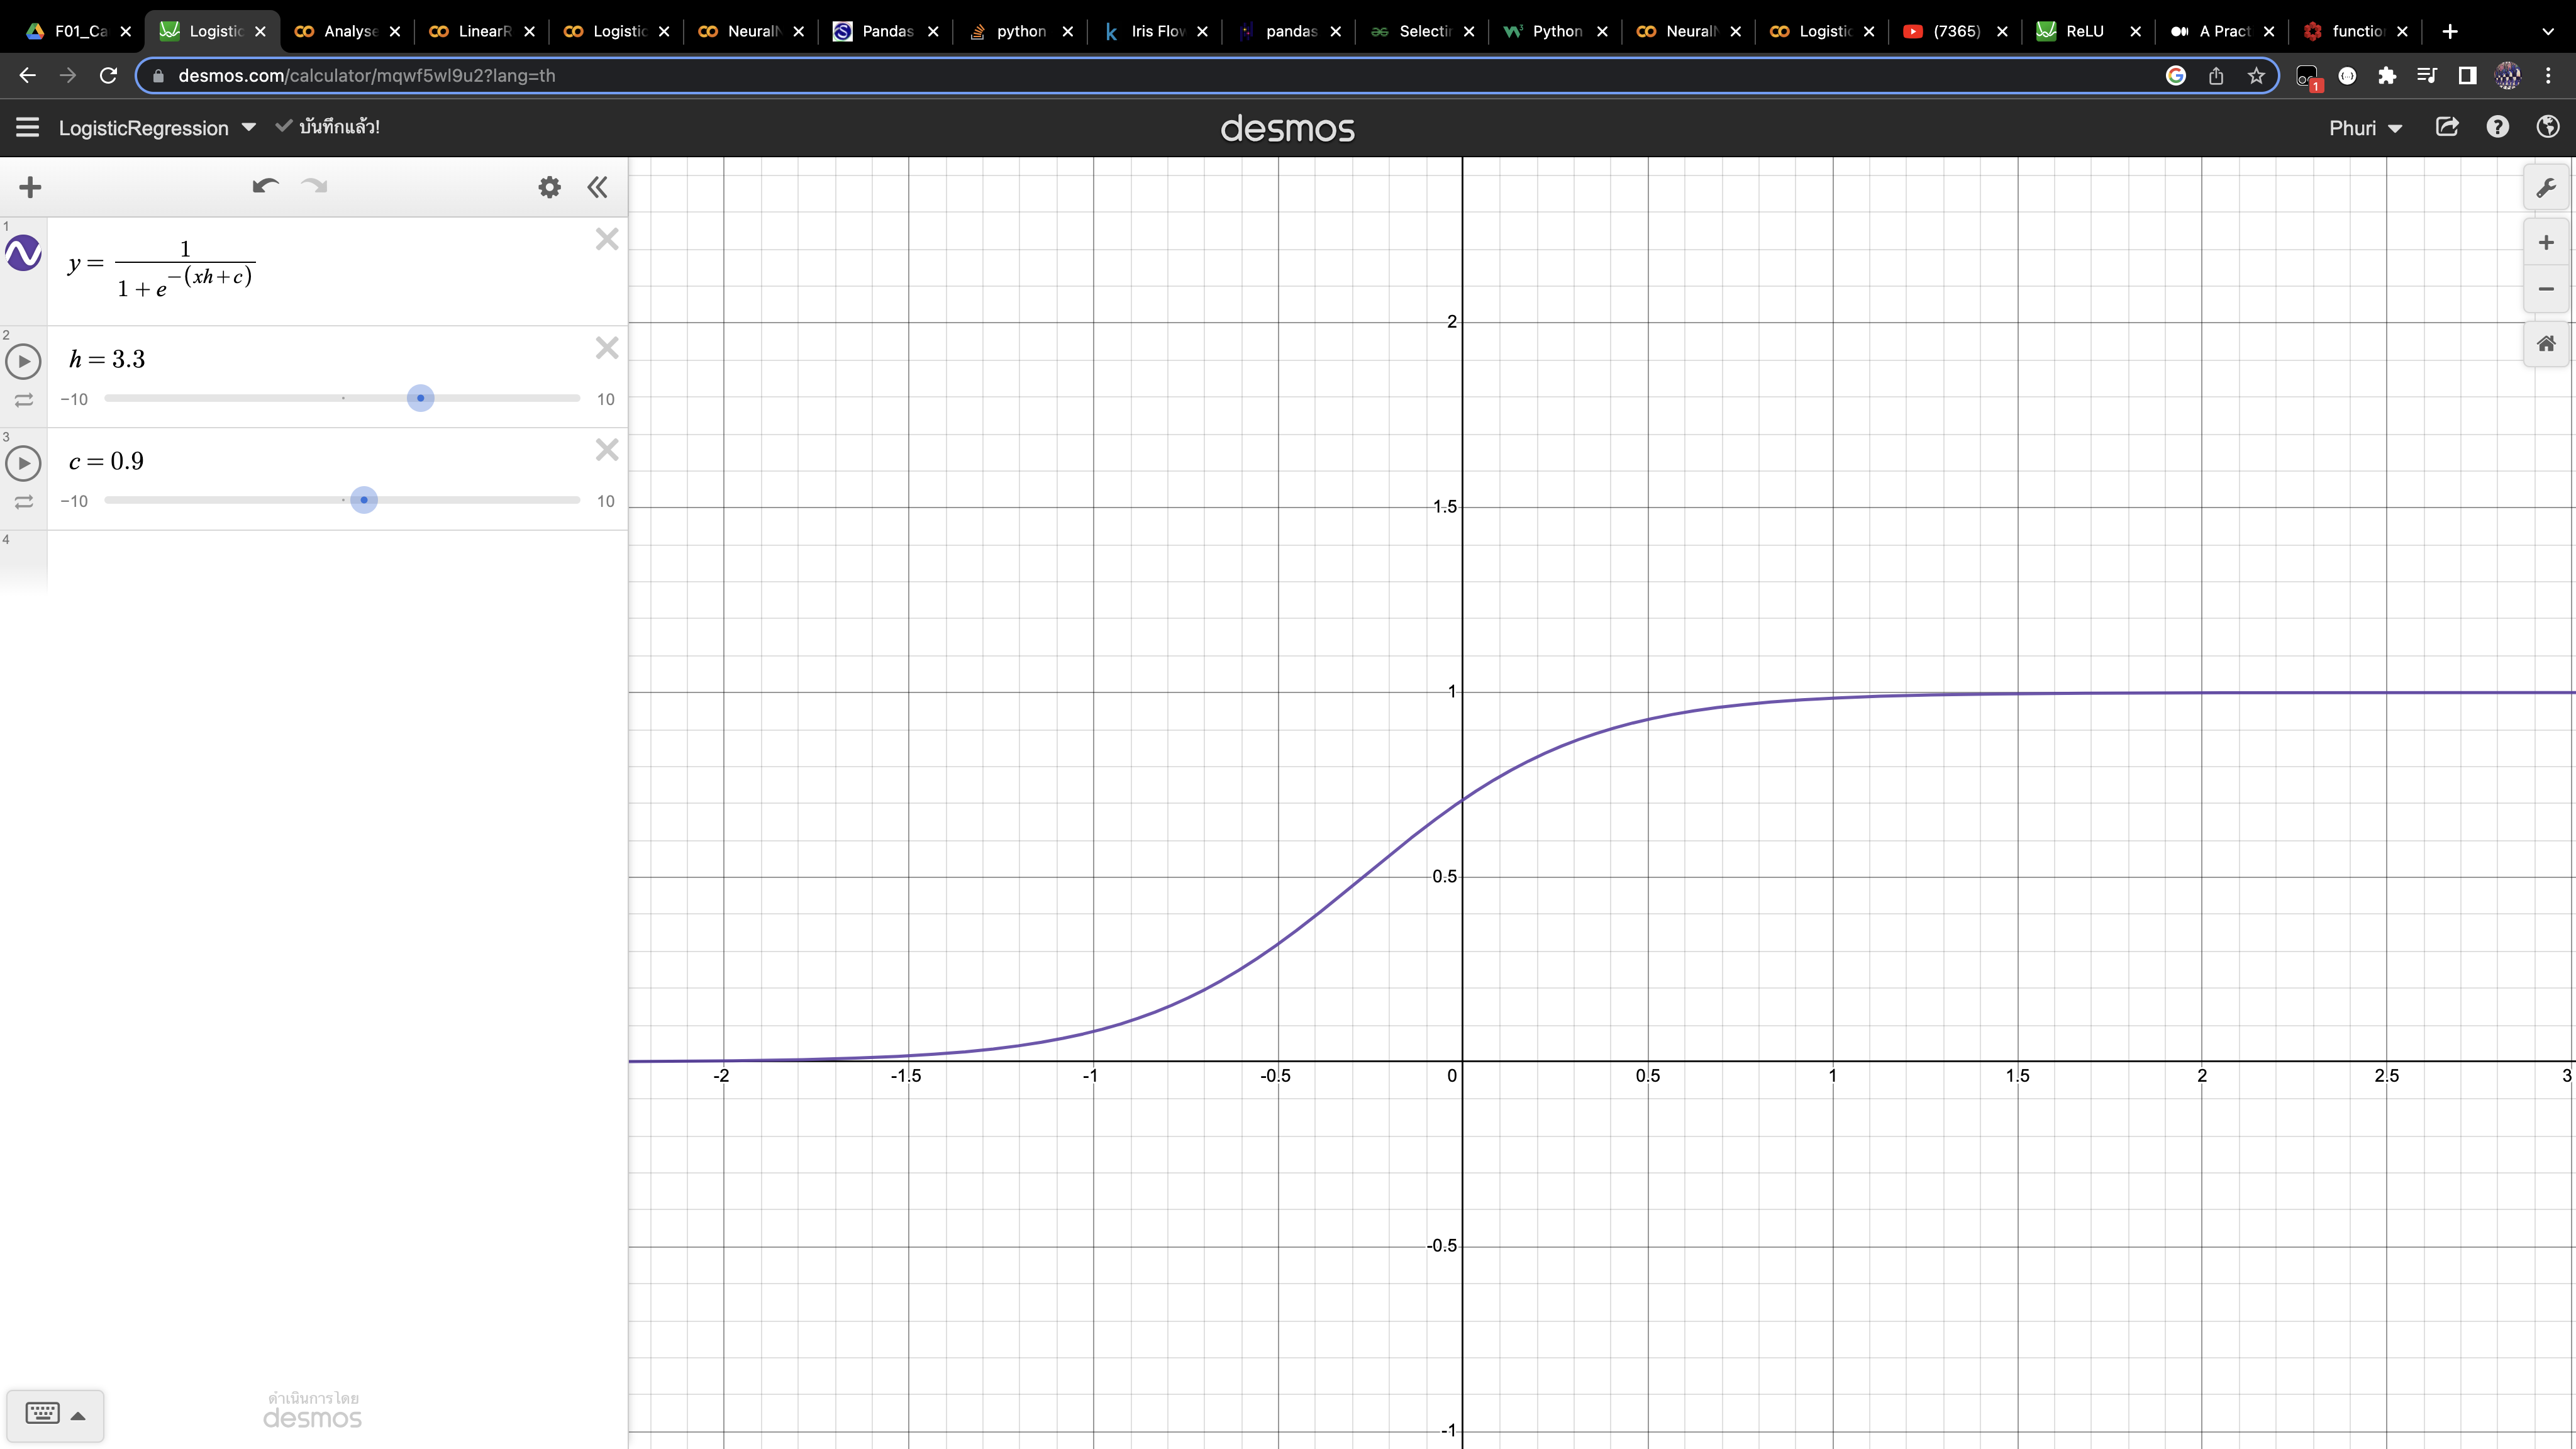

**Q: Why using $e$?**

A: For mathematical simplicity and convenience.
* $e^x=\exp(x)$
* $\frac{d}{dx}[e^x]=e^x$

reference:
* https://www.quora.com/Why-is-logistic-regression-based-on-the-exponential-function-Where-did-the-exponential-function-come-from-anyway
* https://stats.stackexchange.com/questions/338702/why-do-we-use-the-natural-exponential-in-logistic-regression

##Creating Evaluation Function (Loss Function)

**Loss Function (Error Function)**

The Loss function is a method of evaluating how well the hypothesis function is modeling the dataset. The lower the loss function, the better the model. (https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/)

* $J(\vec{w},b)=\sum_{i=1}^m[-y_i\ln(y'_i)-(1-y_i)\ln(1-y'_i)]$
  * $x=$ input of the dataset
  * $y=$ output of the dataset $\in[0,1]$
  * $y'=$ predicted output $\in[0,1]$

Reference:
* https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training
* https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

**Q: Why doing this? $y_i=1\implies\ln(y'_i)$ and $y_i=0\implies\ln(1-y'_i)$**

A:

According to Logarithm: $a^b=c\implies\log_a(c)=b$

$\therefore a^0=1\implies\log_a(1)=0\implies\lim_{c\to1}\log_a(c)=0$

Given that:
* $h(\vec{x})\in[0,1]$
* $h(\vec{x})\geq0.5\implies y=1\implies \ln(h(\vec{x}))\to0$
* $h(\vec{x})<0.5\implies y=0\implies \ln(1-h(\vec{x}))\to0$

**Q: Why we do not use square error function? Why $J(\vec{w},\vec{b})\neq\frac{1}{2m}\sum_{i=1}^m[y'_i-y_i]^2$?**

A: $\frac{1}{2m}\sum_{i=1}^m[y'_i-y_i]^2$ is not suitable with logistic regression because the value of $y$ is not continueous. If the square error function is ploted on $n$ D cartesian plane. Then, the function will display multiple local minimums, which interrupt gradient descent from finding the global minimum.

**Q: Why $\ln(x)$?**

A: For mathematical simplicity

* $\frac{d}{dx}[\ln(x)]=\frac1x$

##Create Optimization Function using Gradient Descent

**Gradient descent of logistic repression**

Gradient descent is an optimization algorithm which is used for minimizing error value of the error function

$\vec{w}_n:=\vec{w}_n-a*\frac{\partial}{\partial \vec{w}_n}J(\vec{w}_n)$
* $\frac{\partial}{\partial \vec{w}_n}J(\vec{w}_n)=X_{n\times m}^T[y_{m}'-y_{m}]$

$b:=b-a*\frac{\partial}{\partial b}J(b)$
* $\frac{\partial}{\partial b}J(b)=\vec{1}^T_{n\times m}[y_{m}'-y_{m}]$

**Note**
* $a,b,\frac{\partial}{\partial b}J(b)\in\mathbb{R}$
* $\vec{w}_n,\frac{\partial}{\partial \vec{w}_n}J(\vec{w}_n)\in\mathbb{R^n}$

Reference:
* https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

#Logistic Regression Implementation from Scratch

##Implementation

In [ ]:
FlowerIndex=0
name=TrY.columns[FlowerIndex]


In [ ]:
def Convert2NumPy(Che):
  if str(type(Che))=="<class 'pandas.core.series.Series'>" or str(type(Che))=="<class 'list'>":
    return np.array(list(Che)).reshape(-1,1)
  elif str(type(Che))=="<class 'pandas.core.frame.DataFrame'>" or str(type(Che))=="<class 'numpy.ndarray'>":
    return Che
  elif str(type(Che))=="<class 'numpy.float64'>" or str(type(Che))=="<class 'numpy.int64'>" or str(type(Che))=="<class 'float'>" or str(type(Che))=="<class 'int'>":
    return np.array([float(Che)]).reshape(-1,1)
  else:
    return Che

def Prediction(X,W,B):
  m=X.shape[0]
  return (1)/(1+np.exp(-np.dot(X,W)-B*np.ones((m,1))))

def R2(X,Y):
  # https://youtu.be/xxFYro8QuXA?si=O9ybmUs32Wv1_-Lk
  L=0
  for x,y in zip(X,Y):
    L+=y*np.log(x+0.0001)+(1-y)*np.log(1-x+0.0001)
  N=0
  M=0
  for i in Y:
    N+=i
    M+=1
  NM=0
  for y in Y:
    NM+=y*np.log(N/M+0.0001)+(1-y)*np.log(1-N/M+0.0001)
  print('L',L)
  print('NM',NM)
  return 1-L/NM

def Log_MLE(X,Y):
  L=0
  for x,y in zip(X,Y):
    L+=y*np.log(x+0.0001)+(1-y)*np.log(1-x+0.0001)
  return -L

def Diff_J(X,Y,W,B):
  m=X.shape[0]
  v1=np.ones((m,1))
  #print('X',X.shape)
  #print('Y',Y.shape)
  #print('W',W.shape)
  #print('np.dot(X,W)',np.dot(X,W).shape)
  return [
      (1/m)*np.dot(X.T,(Prediction(X,W,B)-Y)),   # dW
      (1/m)*np.dot(v1.T,(Prediction(X,W,B)-Y))   # dB
  ]

def Training(
    W,B,X,Y,tX,tY,
    epoch,  # Learning Time
    a,      # Learning Rate
    ):
  History=[]
  # Batch Gradient Descent
  for i in range(epoch):
    DJ=Diff_J(X,Y,W,B)
    dW=DJ[0].reshape(-1,1)
    dB=DJ[1].reshape(-1)[0]
    W=W-a*dW
    B=B-a*dB

    '''
    # Slowly decrease learning rate.
    W=W-a*pow((1-0.01),i)*dW
    B=B-a*pow((1-0.01),i)*dB
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    '''

    row = pd.DataFrame({
              'epoch No.': [i],
              'MLE_Train': [-Log_MLE(Prediction(X,W,B),Y.reshape(-1))],
              'MLE_Test': [-Log_MLE(Prediction(tX,W,B),tY.reshape(-1))],
              })
    History.append(row)
    print('Epoch No.',i)
    print('MSE',row)
    print('** W **\n'+str(W))
    print('** B **\n'+str(B))
  History = pd.concat(History)
  # reference: https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
  return [W,B,History]


##OOP

In [ ]:
class LinearRegressionn:
    def __init__(
                 self,
                 n
                 ):
        # Define Linear Regression
        self.W=np.ones((n,1))
        self.B=0
        self.TrainingTime=0
        self.History=0

    def _Prediction(self,Input):
        return Prediction(Input,self.W,self.B)
    def _Training(self,X,Y,tX,tY,epoch=1000,a=0.005):
        Start = time.time()
        Fitting=Training(self.W,self.B,X,Y,tX,tY,epoch,a)
        self.W = Fitting[0]
        self.B = Fitting[1]
        self.History = Fitting[2]
        self.TrainingTime=time.time() - Start# reference: https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
        print('Training Time',self.TrainingTime)
    def _Evaluation01_LogMLE(self,X,Y):
        return Log_MLE(Prediction(X,self.W,self.B).reshape(-1),Y.reshape(-1))
    def _Evaluation02_R2(self,X,Y):
        return R2(Prediction(X,self.W,self.B).reshape(-1),Y.reshape(-1))

##Training the Model

In [ ]:
TrX.shape

(112, 4)

In [ ]:
TrY.iloc[:,FlowerIndex]

143    0.0
144    0.0
22     1.0
34     1.0
52     0.0
      ... 
23     1.0
40     1.0
142    0.0
44     1.0
60     0.0
Name: Iris-setosa, Length: 112, dtype: float64

In [ ]:
MyModel=LinearRegressionn(TrX.shape[1])
MyModel._Training(
    Convert2NumPy(TrX),
    Convert2NumPy(TrY.iloc[:,FlowerIndex]),
    Convert2NumPy(TeX),
    Convert2NumPy(TeY.iloc[:,FlowerIndex]))

Streaming output truncated to the last 5000 lines.
MSE    epoch No.              MLE_Train               MLE_Test
0        500  [-24.227983657029764]  [-7.7502657863565565]
** W **
[[-0.17815196]
 [ 0.82782797]
 [-0.76590724]
 [ 0.28632665]]
** B **
-0.1139696087586901
Epoch No. 501
MSE    epoch No.              MLE_Train              MLE_Test
0        501  [-24.187421654101634]  [-7.736659868437029]
** W **
[[-0.17786519]
 [ 0.82850296]
 [-0.76690938]
 [ 0.28582946]]
** B **
-0.11381754159667455
Epoch No. 502
MSE    epoch No.              MLE_Train              MLE_Test
0        502  [-24.146987558371276]  [-7.723098754105074]
** W **
[[-0.17757897]
 [ 0.82917686]
 [-0.76791   ]
 [ 0.28533304]]
** B **
-0.11366573382517468
Epoch No. 503
MSE    epoch No.              MLE_Train              MLE_Test
0        503  [-24.106680813956796]  [-7.709582239559247]
** W **
[[-0.17729329]
 [ 0.82984967]
 [-0.76890909]
 [ 0.28483741]]
** B **
-0.11351418467350036
Epoch No. 504
MSE    epoch No.    

##Comparing the predicted output and the actual output.

In [ ]:
for i in range(30):
  nn=1
  print('Task No.',i)
  #print('** Input **\n'+str(TeX.iloc[nn*i,:]))
  print('Prediction =',MyModel._Prediction(Convert2NumPy(TeX.iloc[nn*i,:]).reshape((1,-1))))
  print('Real Result =',TeY.iloc[nn*i,FlowerIndex])#.values[nn*i])

Task No. 0
Prediction = [[0.91991439]]
Real Result = 1.0
Task No. 1
Prediction = [[0.11773041]]
Real Result = 0.0
Task No. 2
Prediction = [[0.85912969]]
Real Result = 1.0
Task No. 3
Prediction = [[0.08339274]]
Real Result = 0.0
Task No. 4
Prediction = [[0.79493863]]
Real Result = 1.0
Task No. 5
Prediction = [[0.05183662]]
Real Result = 0.0
Task No. 6
Prediction = [[0.92739501]]
Real Result = 1.0
Task No. 7
Prediction = [[0.07212305]]
Real Result = 0.0
Task No. 8
Prediction = [[0.03334638]]
Real Result = 0.0
Task No. 9
Prediction = [[0.90566109]]
Real Result = 1.0
Task No. 10
Prediction = [[0.09656689]]
Real Result = 0.0
Task No. 11
Prediction = [[0.77745345]]
Real Result = 1.0
Task No. 12
Prediction = [[0.02421506]]
Real Result = 0.0
Task No. 13
Prediction = [[0.03880052]]
Real Result = 0.0
Task No. 14
Prediction = [[0.87446258]]
Real Result = 1.0
Task No. 15
Prediction = [[0.16410794]]
Real Result = 0.0
Task No. 16
Prediction = [[0.03387891]]
Real Result = 0.0
Task No. 17
Prediction =

#Logistic Regression implementation with SKLearn

###Training

In [ ]:
from sklearn import linear_model

SK_Logis = linear_model.LogisticRegression()
SK_Logis.fit(TrX,TrY.iloc[:,FlowerIndex])

LogisticRegression()

###Comparing the predicted output and actual output

In [ ]:
for i in range(30):
  nn=1
  print('Task No.',i)
  print('Prediction =',SK_Logis.predict(Convert2NumPy(TeX.iloc[nn*i,:]).reshape((1,-1))))
  print('Real Result =',TeY.iloc[nn*i,FlowerIndex])

Task No. 0
Prediction = [1.]
Real Result = 1.0
Task No. 1
Prediction = [0.]
Real Result = 0.0
Task No. 2
Prediction = [1.]
Real Result = 1.0
Task No. 3
Prediction = [0.]
Real Result = 0.0
Task No. 4
Prediction = [1.]
Real Result = 1.0
Task No. 5
Prediction = [0.]
Real Result = 0.0
Task No. 6
Prediction = [1.]
Real Result = 1.0
Task No. 7
Prediction = [0.]
Real Result = 0.0
Task No. 8
Prediction = [0.]
Real Result = 0.0
Task No. 9
Prediction = [1.]
Real Result = 1.0
Task No. 10
Prediction = [0.]
Real Result = 0.0
Task No. 11
Prediction = [1.]
Real Result = 1.0
Task No. 12
Prediction = [0.]
Real Result = 0.0
Task No. 13
Prediction = [0.]
Real Result = 0.0
Task No. 14
Prediction = [1.]
Real Result = 1.0
Task No. 15
Prediction = [0.]
Real Result = 0.0
Task No. 16
Prediction = [0.]
Real Result = 0.0
Task No. 17
Prediction = [1.]
Real Result = 1.0
Task No. 18
Prediction = [0.]
Real Result = 0.0
Task No. 19
Prediction = [0.]
Real Result = 0.0
Task No. 20
Prediction = [0.]
Real Result = 0.0
Ta

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

#Evaluation

###Note

This documentation provide 4 technoques to evaluate the accuracy of 2 logistic regression models which based on this website (https://meettank29067.medium.com/performance-measurement-in-logistic-regression-8c9109b25278) and this video (https://youtu.be/xxFYro8QuXA).
1. Confusion Matrix
2. ROC curve
3. $R^2$ for Logistic Regression

This document is also including the implementation of each techniques.

However, this document does not indicates the pro, cons and limitation of each statistical evaluation technoques. Some techniques might suitable for some other machine learning models and/or some other specific problems and vice versa. I might document other related detail in the future, if it is connect to my future documentation topic.

###Confusion matrix

**Note**
* False = The Model predicts the input incorrectly
* True = The Model predicts the input correctly
* The lower the False Positive and False negative, the more accurate the model is.

In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def ConfusionMatrix(Hypo,Coef,Inte,dX,dY,Threshold=0.5):
  TP=0
  FP=0
  TN=0
  FN=0
  Predictt=Hypo(Coef,Inte,dX)
  for i in range(len(dY)):
    if (Predictt[i]>=Threshold and dY.iloc[i]==1):
      TP+=1
    elif (Predictt[i]>=Threshold and dY.iloc[i]==0):
      FP+=1
    elif (Predictt[i]<Threshold and dY.iloc[i]==0):
      TN+=1
    elif (Predictt[i]<Threshold and dY.iloc[i]==1):
      FN+=1
  #Confusion = pd.DataFrame({'Actual_Positive':[TP,FN],'Actual_Negative':[FP,TN]},index=['Predict_Positive', 'Predict_Negative'])
  Confusion = pd.DataFrame({'Predict_Negative':[TN,FN],'Predict_Positive':[FP,TP]},index=['Actual_Negative', 'Actual_Positive'])
  return [Confusion,[TP,FP,TN,FN]]

In [ ]:
ConfusionMatrix(
    LogisR_Hypo,
    MyModel.W,
    MyModel.B,
    TeX,TeY.iloc[:,FlowerIndex],
    Threshold=0.5)[0]

,Predict_Negative,Predict_Positive
Actual_Negative,25,0
Actual_Positive,0,13


In [ ]:
ConfusionMatrix(
    LogisR_Hypo,
    SK_Logis.coef_[0],
    SK_Logis.intercept_[0],
    TeX,TeY.iloc[:,FlowerIndex],
    Threshold=0.5)[0]

,Predict_Negative,Predict_Positive
Actual_Negative,25,0
Actual_Positive,0,13


**Result**

According to confusuion matrix when threshold=0.5, my implementation is better than SK Learn implementation.

**Confusion Matrix in SKLearn**
* SKLearn can also compute Confusion Matrix with multiple classification
* SKLearn can also compute Confusion Matrix with data other than 0 and 1.

In [ ]:
from sklearn.metrics import confusion_matrix

def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

print('\nbinary classification confusion matrix')
print('[[true_n, false_p,]')
print('[false_n, true_p]]')

print('\nSK_Predict')
SK_Predict=SK_Logis.predict(TeX)
print(confusion_matrix(TeY.iloc[:,FlowerIndex], SK_Predict))

MyModel_Predict=[]
Threshold=0.5

for i in LogisR_Hypo(MyModel.W,MyModel.B,TeX):
  if i>=Threshold:
    MyModel_Predict.append(1)
  else:
    MyModel_Predict.append(0)

print('\nMyModel_Predict')
print(confusion_matrix(TeY.iloc[:,FlowerIndex], np.array(MyModel_Predict)))
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


binary classification confusion matrix
[[true_n, false_p,]
[false_n, true_p]]

SK_Predict
[[25  0]
 [ 0 13]]

MyModel_Predict
[[25  0]
 [ 0 13]]


###ROC curve (receiver operating characteristic curve)

In [ ]:
def ROC(Hypo,Coef,Inte,dX,dY,iteration=200):
  Thresholds = np.linspace(0, 1, iteration)
  # In this case, tn=0,
  # therefore when np.linspace(0, 1, iteration), fpr = 1
  Set_X=[]
  Set_Y=[]
  Set_Z=[]
  for i in Thresholds:
    Catrix=ConfusionMatrix(Hypo,Coef,Inte,dX,dY,Threshold=i)

    # False = The Model predicts the input incorrectly
    # True = The Model predicts the input correctly
    # [TP,FP,TN,FN]
    tp=Catrix[1][0] # True Positive
    fp=Catrix[1][1] # False Positive
    tn=Catrix[1][2] # True Negative
    fn=Catrix[1][3] # False Negative

    # If the variable devined by 0, there will be an error.
    # If (tp+fn) = 0, means tp = 0, therefore tpr = 0
    try:
      fpr=fp/(fp+tn)  # False Positive Rate
    except:
      fpr=0
    try:
      tpr=tp/(tp+fn)  # True Positive Rate
    except:
      tpr=0

    # Sometimes, percision is used instead of false positive rate.
    # It is a good idea to use this algorithm when the data is imbalance,
    # such as when predict whatever the patients have rare disease.
    # reference: https://youtu.be/4jRBRDbJemM
    #try:
    #  percision=tp/(tp+fp)
    #except:
    #  percision=0
    #Set_X.append(percision)

    Set_X.append(fpr)
    Set_Y.append(tpr)
    Set_Z.append(i)
  return [Set_X,Set_Y,Set_Z]

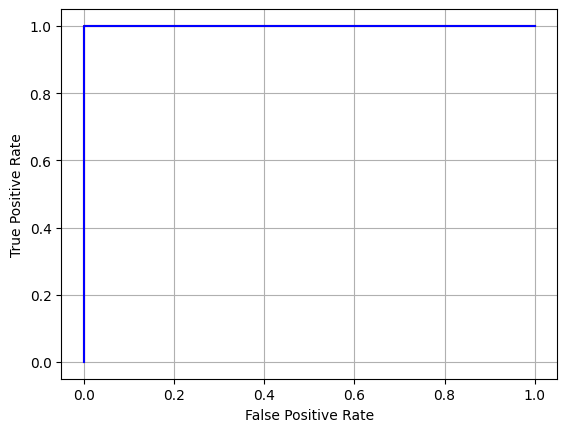

In [ ]:
My_ROC=ROC(LogisR_Hypo,MyModel.W,MyModel.B,TeX,TeY.iloc[:,FlowerIndex])
SK_ROC=ROC(LogisR_Hypo,SK_Logis.coef_[0],SK_Logis.intercept_[0],TeX,TeY.iloc[:,FlowerIndex])

plt.plot(My_ROC[0],My_ROC[1],color='red')
plt.plot(SK_ROC[0],SK_ROC[1],color='blue')

#plt.scatter(Pr_ROC[0],Pr_ROC[1],color='blue')
#plt.scatter(SK_ROC[0],SK_ROC[1],color='red')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

**About This graph**

False means that the Model predicts the input incorrectly. On the other hands, True means the opposite. Therefore the lower False positive rate (left) and the higher True positive rate (up), the better the model is.

Another ways to compare both models is to measure the area under the curve (AUC). the larger the area is, the better the model because it means that the model always predict True positive rate correct in any Classification Threshold.

In [ ]:
from sklearn.metrics import auc # area under curve

My_AUC = auc(My_ROC[0],My_ROC[1])
SK_AUC = auc(SK_ROC[0],SK_ROC[1])

print("My_AUC =", My_AUC)
print("SK_AUC =", SK_AUC)

# reference: https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t

My_AUC = 1.0
SK_AUC = 1.0


###Maximum Likelihood Estimation

**Maximum Likelihood Estimation Formula**

$L=y'=\max\Pi_{i=1}^m P(w,x_i)$
* $\max=$ return a maximum value
* $w=$ an approximated parameter (estimator)
* $P=$ probability function

**Note**
* The goal of Maximum Likelihood Estimation is to find the parameter that output greatest amount of probability

**The relationship between Maximum Likelihood Estimation and Loss Function of Logistic Regression**

Given that
* $L=y'=\max\Pi_{i=1}^mP(w,x_i)$
* $P=\vec{y}'=h(x)=\frac{1}{1 + \exp({-(x\cdot \vec{w}+b)})}=$ Probability $\in[0,1]$
* $m=$ number of all data point



for every data point $y=1\implies L_{1}=\Pi_{i=1}^{m_1}y'*y$

for every data point $y=0\implies L_{0}=\Pi_{i=1}^{m_0}(1-y')*(1-y)$

for every data point $\implies L_{1}*L_{0}$

According to Logarithm: $\log_c(ab)=\log_c(a)+\log_c(b)$

$\therefore \ln(L)=\ln(L_1)+\ln(L_0)$

$\therefore \ln(L)=\sum_{i=1}^m[y_i\ln(y'_i)+(1-y_i)\ln(1-y'_i)]$

Multiply the function by $-1$

$\therefore -\ln(L)=\sum_{i=1}^m[-y_i\ln(y'_i)-(1-y_i)\ln(1-y'_i)]$

**Reference:**
* https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67

In [ ]:
print('MLE MyModel =',MyModel._Evaluation01_LogMLE(Convert2NumPy(TeX),Convert2NumPy(TeY.iloc[:,FlowerIndex])))
print('MLE SK_Logis = ',Log_MLE(SK_Logis.predict(TeX),TeY.iloc[:,FlowerIndex]))

MLE MyModel = 4.082564172390442
MLE SK_Logis =  -0.0037998100126653005


###$R^2$ for Logistic Regression

**What is $R^2$?**

$R^2$ is the value that measures how well the model predicts the data.

**Formula**
* $R^2=1-\frac{\ln(L)}{N}=\frac{N-\ln(L)}{N}\in[0,1]$
 * $\ln(L)=-J=$ Log of Proposed Model = Log Likelihood
 * $N=\frac{D^1}{D}=$ Null Model
 * $D^1=$ number of all data points with positive value
 * $D=$ number of all data points

**Note**
* If the $\ln(L)\to0\implies R^2=1$

**Reference:**
* https://youtu.be/xxFYro8QuXA?si=O9ybmUs32Wv1_-Lk

In [ ]:
print('R2 MyModel =',MyModel._Evaluation02_R2(Convert2NumPy(TeX),Convert2NumPy(TeY.iloc[:,FlowerIndex])))
print('R2 SK_Logis = ',R2(SK_Logis.predict(TeX),TeY.iloc[:,FlowerIndex]))

L -4.082564172390442
NM -24.404437644944803
R2 MyModel = 0.8327122209580553
L 0.0037998100126653005
NM -24.404437644944803
R2 SK_Logis =  1.0001557016009937


#Plotting Graph

##Ploting the accual and predicted value

In [ ]:
TrX.columns[0]

'sepal_length'

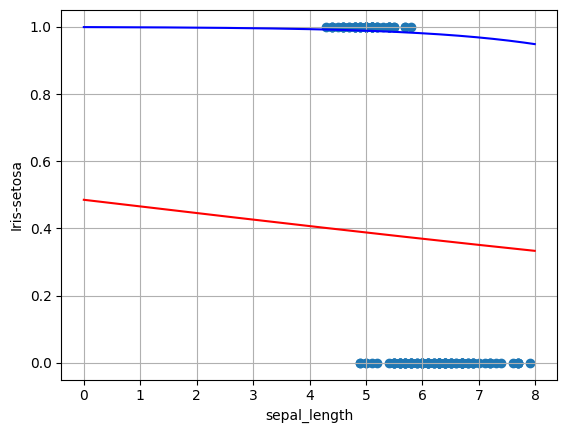

In [ ]:
def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

# 1/(1+np.exp(-(xline*2-3)))

def EvaluationFunction(data,ind_x,ind_y,h0=0,h1=0):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))
  num*=(1/data.shape[0])
  return num

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

indd=0 # max: 3

plt.xlabel(TrX.columns[indd])
plt.ylabel(TrY.columns[FlowerIndex])

# Data is plotted.
plt.scatter(df[TrX.columns[indd]], df[TrY.columns[FlowerIndex]])

# Here is the hypothesis function a.k.a. prediction function.
xline = np.arange(0, 8,0.01)
yline01 = HypothesisFunction(xline,MyModel.B,MyModel.W[indd])
yline02 = HypothesisFunction(xline,SK_Logis.intercept_[0],SK_Logis.coef_[0][indd])
plt.plot(xline, yline01, color='red')
plt.plot(xline, yline02, color='blue')

plt.show()

**About this graph**

This graph indicates how 2 logistic regression predict the relationship between input and output data, compare to the accual data.

##Ploting bias (x), weight (y) and the Loss function (z)

/usr/local/lib/python3.10/dist-packages/numpy/lib/scimath.py:296: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
<ipython-input-30-cbae101105c6>:34: RuntimeWarning: invalid value encountered in multiply
  num-=(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
<ipython-input-30-cbae101105c6>:12: RuntimeWarning: invalid value encountered in multiply
  num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))+(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))


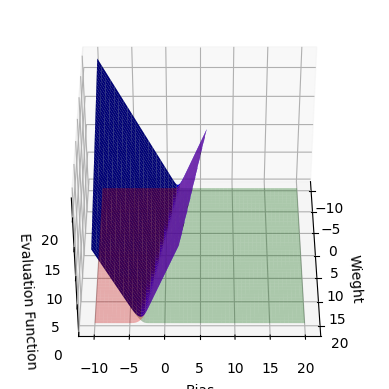

In [ ]:
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

def EvaluationFunction(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))+(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue

  num*=(1/dX.shape[0])
  return num

def EvaluationFunction01(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue

  num*=(1/dX.shape[0])
  return num

def EvaluationFunction02(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue

  num*=(1/dX.shape[0])
  return num
  # reference: https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

'''
# This is the evaluation function of linear regression
def LineR_Evaluation_1f(data,ind_x,ind_y,h0=0,h1=0):#m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(data.shape[0]):
      sigma +=pow((data.iat[i,ind_x]*h0+h1-data.iat[i,ind_y]),2)
    return (1/(2*data.shape[0]))*sigma'''

N = 300
M = 300

x_values = np.linspace(-10, 20, N)
y_values = np.linspace(-10, 20, M)

X, Y = np.meshgrid(x_values, y_values)
Z01 = EvaluationFunction01(TrX,TrY.iloc[:,FlowerIndex],h0=X,h1=Y)
Z02 = EvaluationFunction02(TrX,TrY.iloc[:,FlowerIndex],h0=X,h1=Y)
Z = EvaluationFunction(TrX,TrY.iloc[:,FlowerIndex],h0=X,h1=Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,color='blue');
ax.plot_surface(X,Y,Z01,alpha=.3,color='green');
ax.plot_surface(X,Y,Z02,alpha=.3,color='red');

ax.set_xlabel('Wieght')
ax.set_ylabel('Bias')
ax.set_zlabel('Evaluation Function')
ax.view_init(40,0);


**About this graph**

* $h=h(x,w,b)=\frac{1}{1+\exp(-wx-b)}$
* The Green graph $=\ln(h)$
* The Red graph $=\ln(1-h)$
* The blue graph $=\ln(h)+\ln(1-h)$

The lower the areas of the blue graph, means the lower the value of loss function (the better the model is).

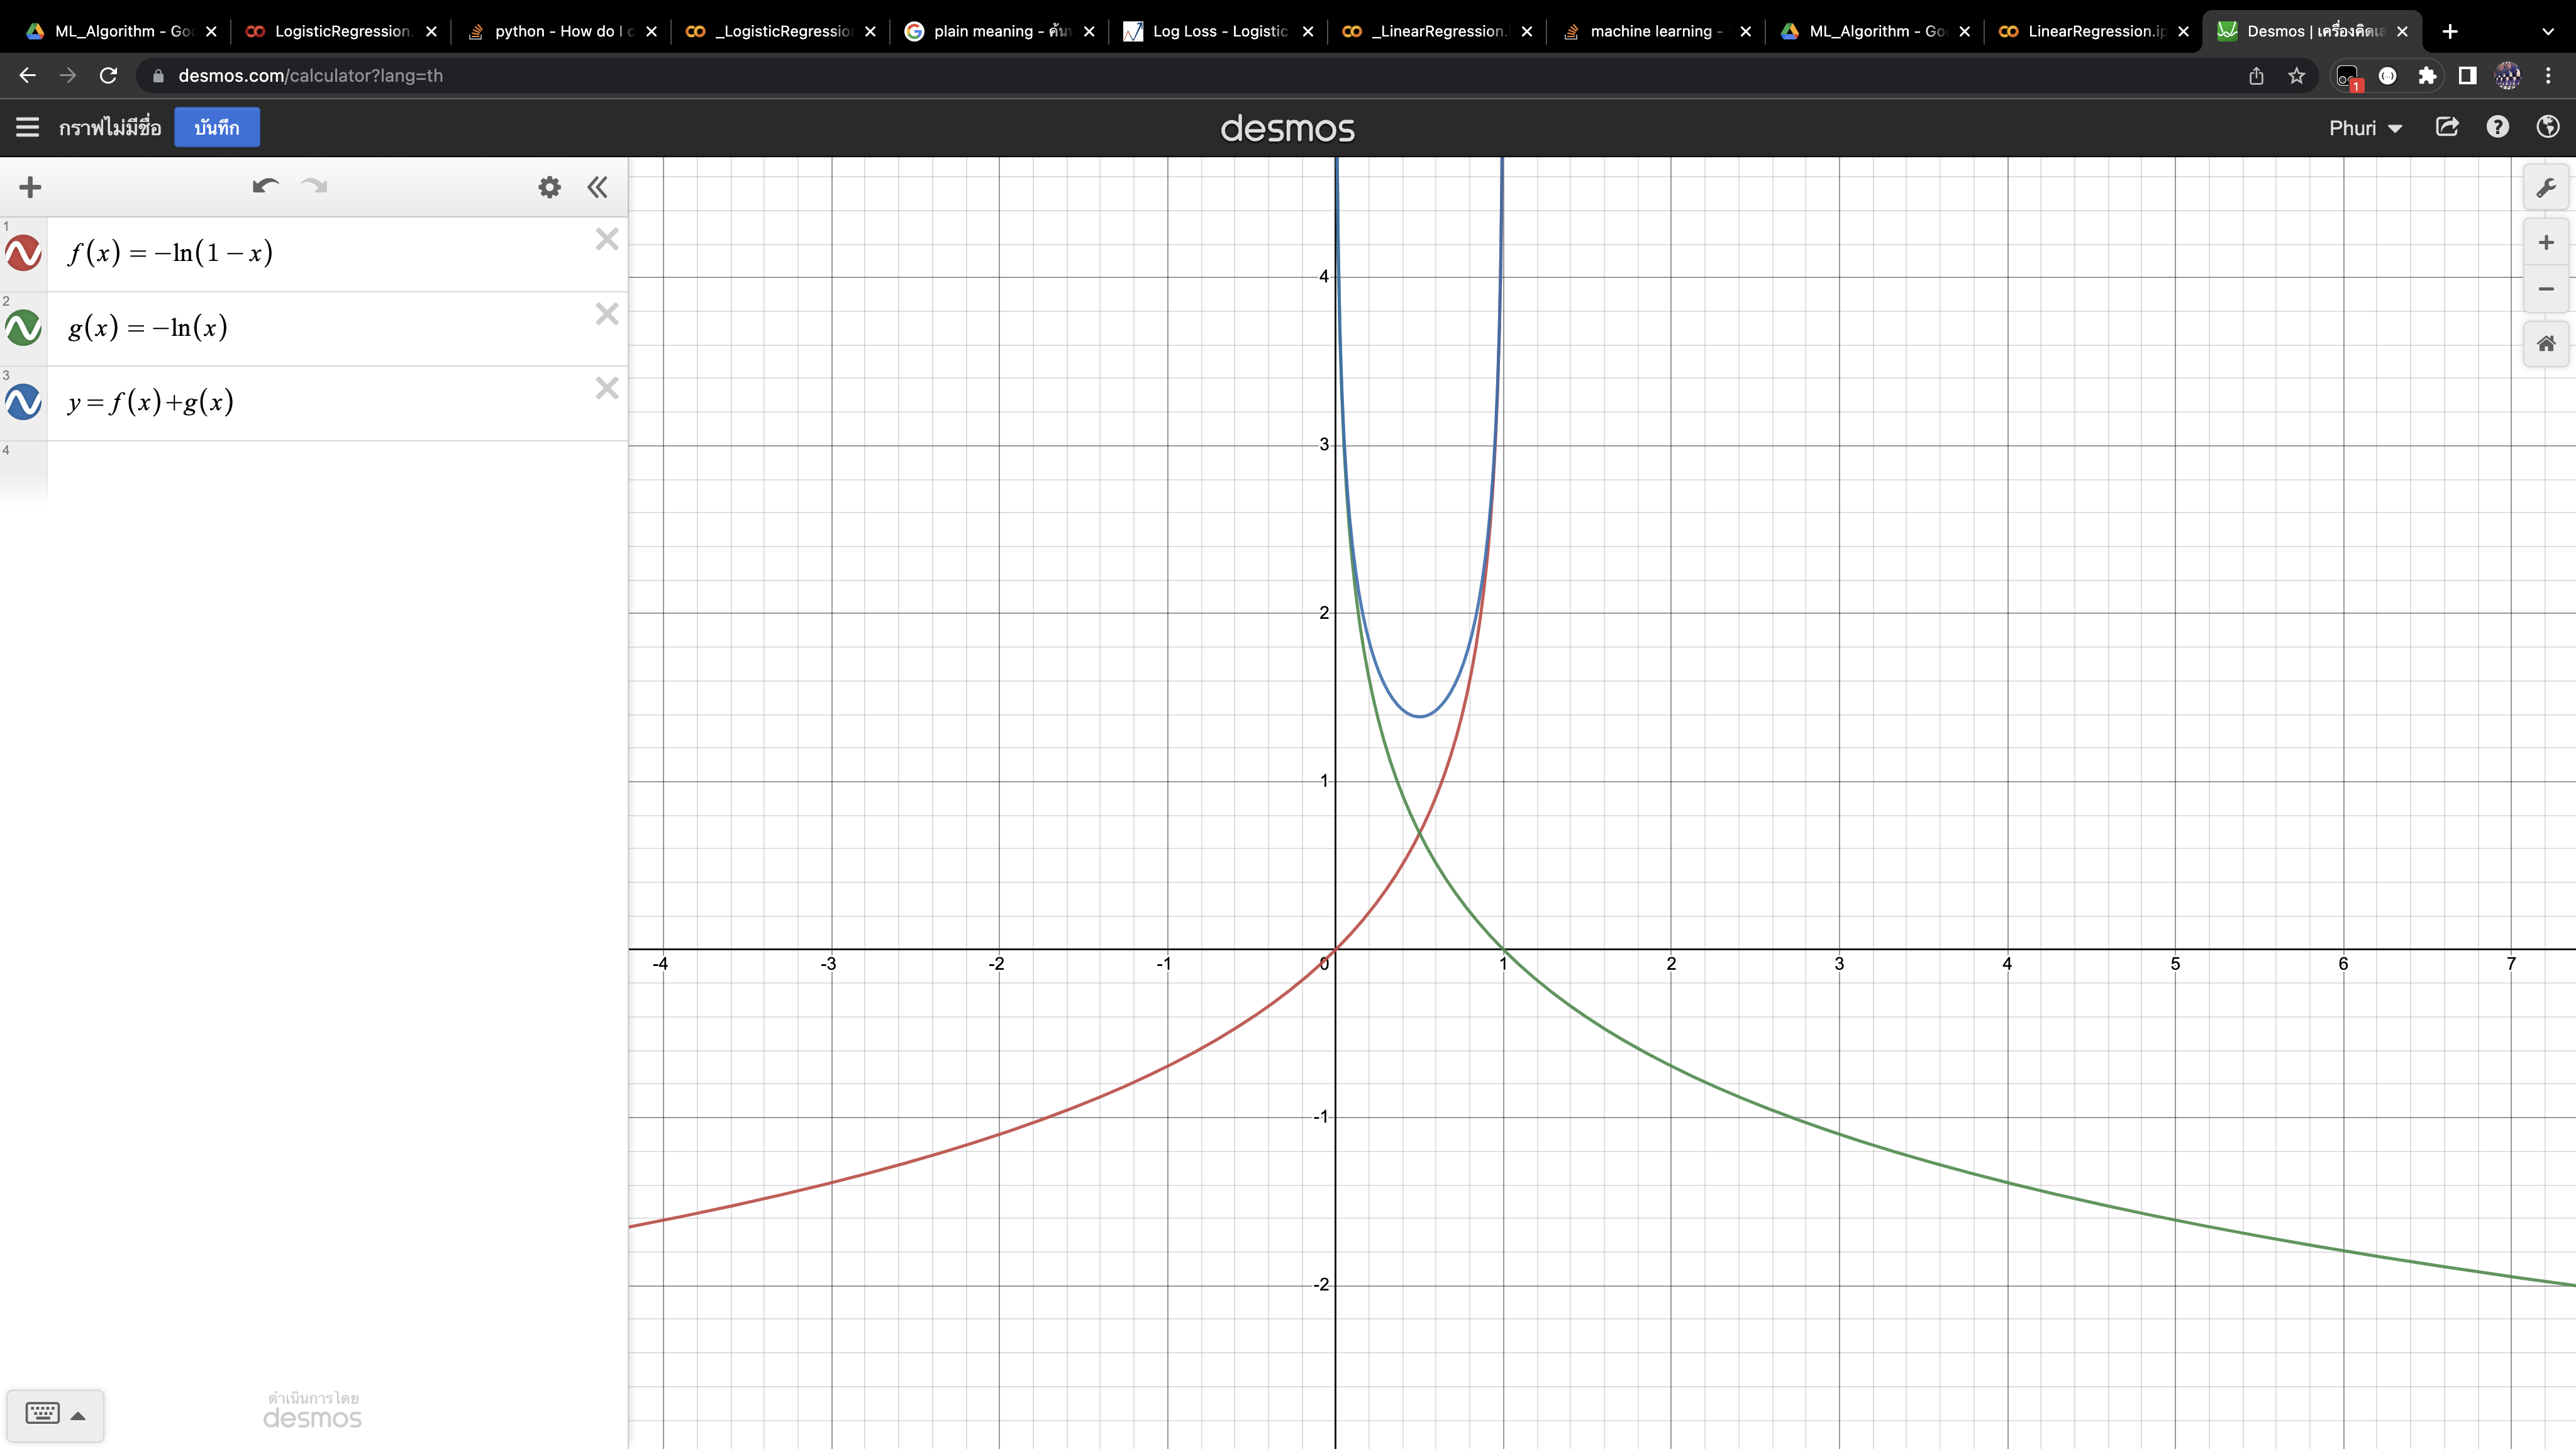

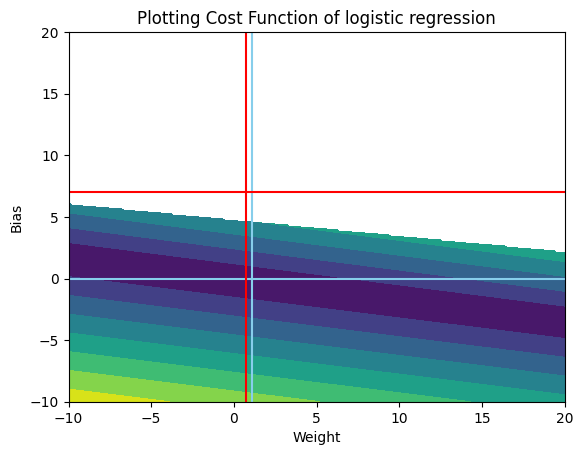

In [ ]:
fig, ax = plt.subplots(1, 1)

#ax.contourf(X, Y, Z01,alpha=.5,cmap='Greens')
#ax.contourf(X, Y, Z02,alpha=.5,cmap='Reds')
#ax.contourf(X, Y, Z,alpha=0.5,cmap='Blues')
ax.contourf(X, Y, Z)
# reference: https://stackoverflow.com/questions/57525830/how-do-i-combine-multiple-contour-plots
ax.axvline(MyModel.W[1],color='skyblue')
ax.axhline(MyModel.B,color='skyblue')
ax.axvline(SK_Logis.coef_[0][1],color='red')
ax.axhline(SK_Logis.intercept_[0],color='red')

ax.set_title('Plotting Cost Function of logistic regression')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')

plt.show()
# reference: https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/

**About this graph**

The darker the areas of the graph (the previous 3D blue graph), means the lower the value of loss function (the better the model is). It is noteworthly that the weight approach the darker area. However the bias do not always approaches darker area because it have to "consider" the other weight element in the weight vector.

##Ploting the epochs and Loss function (y)

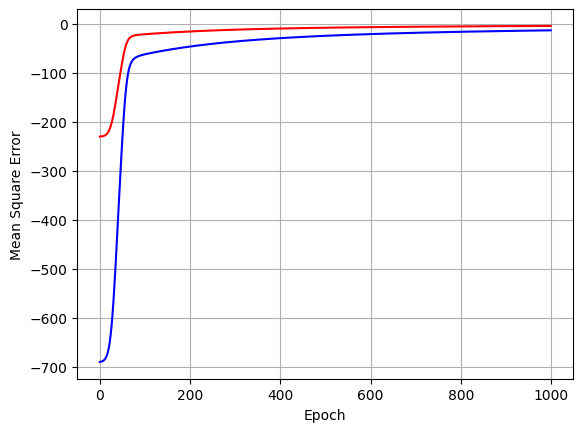

In [ ]:
plt.plot(MyModel.History['epoch No.'],MyModel.History['MLE_Train'],color='blue')
plt.plot(MyModel.History['epoch No.'],MyModel.History['MLE_Test'],color='red')
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
plt.grid()
plt.show()